# Exemplo de código para simulações de processos de Poisson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 26})  # increase the font size

## Função que define o processo de Poisson

Os processos de Poisson podem ser gerados a partir de eventos discretos cujo tempo entre eventos segue uma distribuição exponencial.

In [2]:
def generate_poisson_process(mu, num_events):
    time_intervals = np.random.exponential(1./mu, num_events);
    total_events = time_intervals.cumsum();
    events = pd.DataFrame(np.ones(num_events), index=total_events);
    events[0] = events[0].cumsum();

    return events;

# Primeiro exemplo de simulação

Realizando uma simulação e plotando cada evento com seu tempo reespectivo.

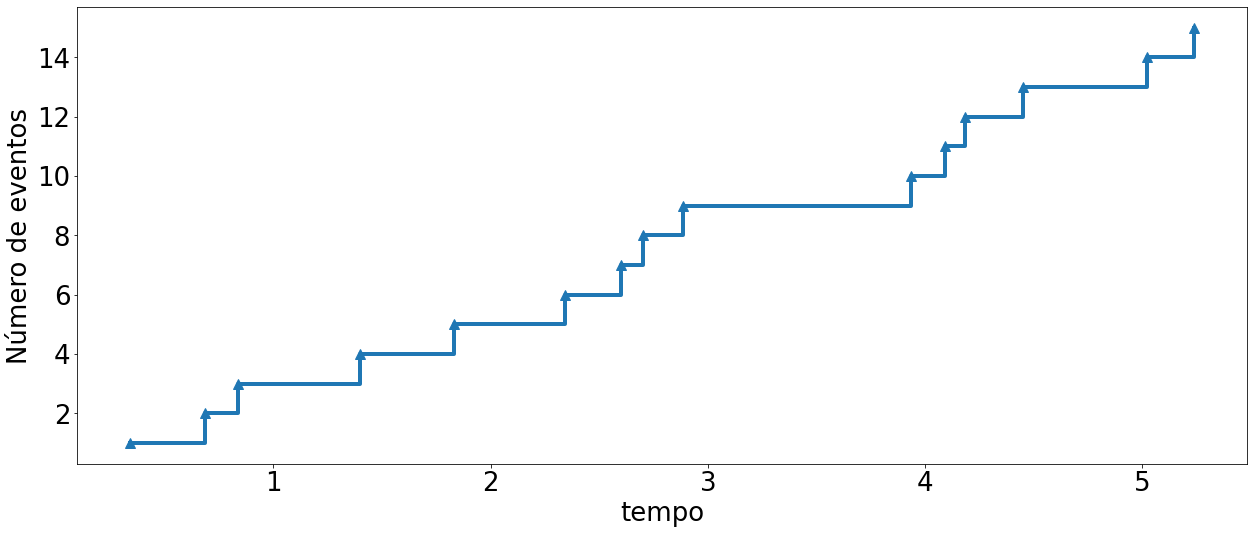

In [3]:
# Definindo os parâmetros da simulação
mu = 2;
num_events_simulated = 15;

# Simulando e plotando os resultados
plt.figure(figsize=(18, 8));
plt.plot(generate_poisson_process(mu, num_events_simulated), marker='^', drawstyle='steps-post', lw=4, ms=10);
plt.xlabel("tempo");
plt.ylabel("Número de eventos");

# Saving figure
plt.tight_layout();
plt.savefig("PP_1.pdf")

Aqui fica visualmente evidente como funcionam os processos de Poisson.
Note que estes eventos são discretos, porém os tempos entre eventos apresentam uma "grande variação". De fato, esta é determinada pela distribuição exponencial, ou seja, é igual ao parâmetro que a define.

# Segundo exemplo: Processo de contagem

Processos de Poisson podem ser interpretados como processos de contagem. 
Sabemos que para um processo com parâmetro $\mu$ a probabilidade de observar $k$ eventos é dada por
$P(N(t) = k) = \frac{(\mu t)^k}{k!} e^{-\mu t}$.
Note que esta é uma distribuição de Poisson com parâmetro $\mu$.

Neste exemplo nós realizamos a simulação de vários processos independentes e verificamos se nossa distribuição é compatível com uma distribuição de Poisson.

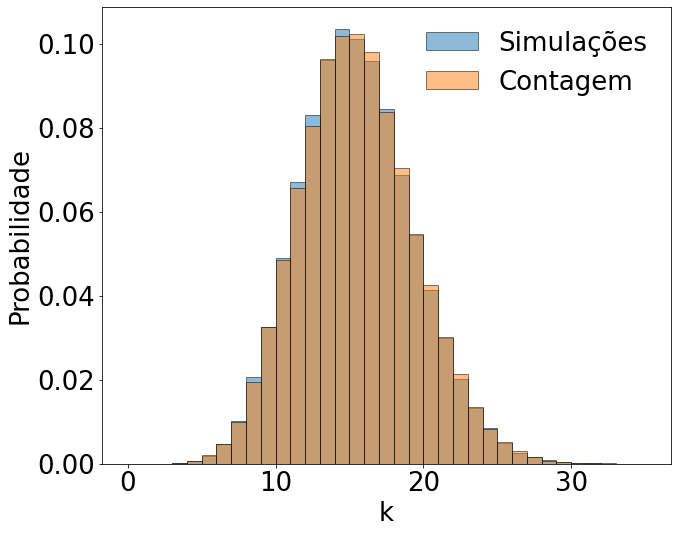

In [4]:
# Definindo os parâmetros da simulação
num_events_simulated = 100;
mu = 15;
tau = 1;
results = [];

# Simulando os processos de Poisson várias vezes
for x in range(100000):
    process = generate_poisson_process(mu, num_events_simulated);
    
    if len(process[:tau][0]) == 0:
        results.append(0);
        
    else:
        results.append(process[:tau][0].iloc[-1]);

# Amostrando os dados de uma distribuição de Poisson (teórica)
r = np.random.poisson(mu, size=100000);

# Plotando os resultados
plt.figure(figsize=(10, 8));
plt.hist(results, bins=np.linspace(0, 35, 36), density=True, alpha=0.5, label='Simulações', ec='black');

plt.hist(r, bins=np.linspace(0, 35, 36), density=True, alpha=0.5, label='Contagem', ec='black');


plt.ylabel("Probabilidade");
plt.xlabel(r'k');
plt.legend(frameon=False);

# Saving figure
plt.tight_layout();
plt.savefig("PP_2.pdf")

Como podemos observar, ambas distribuições são bastante semelhantes.